# LINEAR REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics


In [ ]:
from google.colab import files
files.upload()
dataset=pd.read_csv('10500 AAPL.csv')

Saving 10500 AAPL.csv to 10500 AAPL.csv


In [ ]:
dataset.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400


In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [ ]:
print(dataset.shape)
print(len(dataset))

(10468, 7)
10468


In [ ]:
dataset.drop('Adj Close',axis = 1, inplace=True)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [ ]:
dataset.isnull().sum()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10468 non-null  datetime64[ns]
 1   Open    10468 non-null  float64       
 2   High    10468 non-null  float64       
 3   Low     10468 non-null  float64       
 4   Close   10468 non-null  float64       
 5   Volume  10468 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 490.8 KB


,Open,High,Low,Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,7.421641e+09


<Axes: >

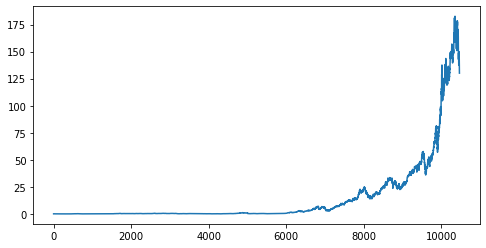

In [ ]:
dataset['Open'].plot(figsize=(8,4))

In [ ]:
x=dataset[['High','Low','Open','Volume']].values
y=dataset['Close'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(8374, 4)
(2094, 4)


In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)
predicted=regressor.predict(x_test)
print(predicted)

[ 8.48165369e-01  8.05597807e-01 -6.54052598e-01  3.41326967e-12]
0.0005741970717121347
[  0.24334416  54.13702431   5.97901295 ... 133.55522776   6.1249463
   0.18879515]


In [ ]:
predicted.shape


(2094,)

In [ ]:
dframe=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predicted.flatten()})
dframe.head(15)

,Actual,Predicted
0,0.235491,0.243344
1,53.865002,54.137024
2,5.935357,5.979013
3,0.349330,0.351483
4,15.797143,15.927407
5,5.472500,5.527048
6,23.020000,23.051784
7,0.080357,0.081221
8,52.630001,53.476746
9,1.083147,1.105948


In [ ]:
regressor.score(x_test,y_test)


0.9999450337832296

In [ ]:
import math
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, predicted))
print("Mean squared Error:",metrics.mean_squared_error(y_test, predicted))
print("root mean squared Error:",math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.06715046791238262
Mean squared Error: 0.04799046685310576
root mean squared Error: 0.2190672655900597


<Axes: >

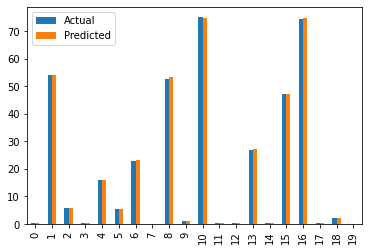

In [ ]:
graph=dframe.head(20)
graph.plot(kind='bar')

# SUPPORT VECTOR REGRESSION

In [ ]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
files.upload()
df=pd.read_csv('10500 AAPL.csv')

Saving 10500 AAPL.csv to 10500 AAPL (1).csv


In [ ]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


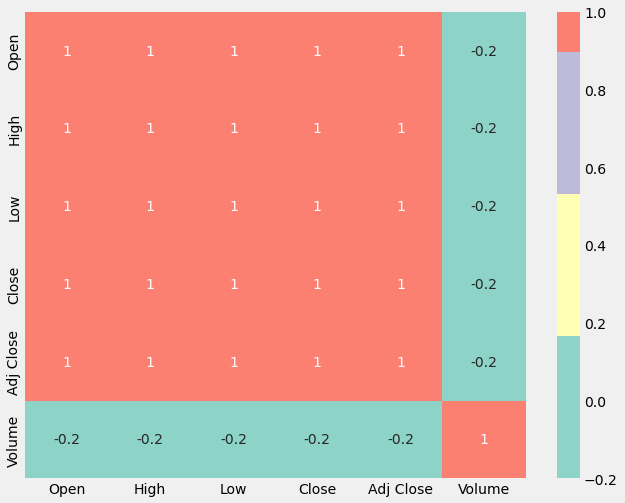

In [ ]:
import seaborn as sns
cor = df.corr()
plt.figure(figsize=(10,8))
plot=sns.heatmap(data=cor.round(2),annot=True,cmap='Set3',center=2)

In [ ]:
future_days=5

In [ ]:
df[str(future_days)+'_Day_Price_Forecast']=df[['Close']].shift(-future_days)
df[['Close', str(future_days)+'_Day_Price_Forecast']]  

,Close,5_Day_Price_Forecast
0,0.128348,0.126116
1,0.121652,0.132254
2,0.112723,0.137835
3,0.115513,0.145089
4,0.118862,0.158482
...,...,...
10463,131.880005,NaN
10464,132.759995,NaN
10465,135.429993,NaN
10466,130.059998,NaN


In [ ]:
x=np.array(df[['Close']])
x=x[:df.shape[0]-future_days]
print(x)

[[1.28348000e-01]
 [1.21652000e-01]
 [1.12723000e-01]
 ...
 [1.47960007e+02]
 [1.42639999e+02]
 [1.37130005e+02]]


In [ ]:
y=np.array(df[str(future_days)+'_Day_Price_Forecast'])
y=y[:-future_days]
print(y)

[1.26116000e-01 1.32254000e-01 1.37835000e-01 ... 1.35429993e+02
 1.30059998e+02 1.31559998e+02]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:

from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly= SVR(kernel='poly', C=1e3, degree=2)
svr_lin .fit(x_train, y_train)
svr_poly.fit(x_train, y_train)

SVR(C=1000.0, degree=2, kernel='poly')

In [ ]:
svr_rbf_confidence=svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)
svr_lin_confidence=svr_lin.score(x_test, y_test)
print('svr_lin accuracy:', svr_rbf_confidence)
svr_poly_confidence=svr_poly.score(x_test, y_test)
print('svr_poly accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.9980807225697335
svr_lin accuracy: 0.9980807225697335
svr_poly accuracy: 0.9980807225697335


In [ ]:
svm_prediction=svr_rbf.predict(x_test)
print(svm_prediction)

[25.32943501  0.40458292 21.84842079 ...  0.35161047  0.35436915
  0.64874186]


In [ ]:
print(y_test)

[24.735001  0.373884 21.389286 ...  0.290179  0.300781  0.555   ]


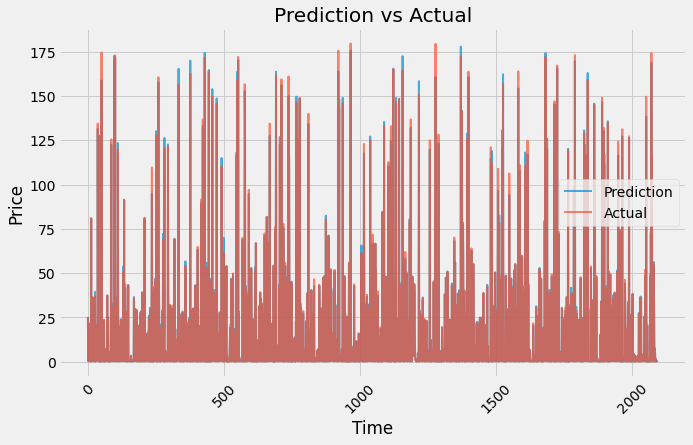

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
dframe=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':svm_prediction.flatten()})
dframe.head(15)

,Actual,Predicted
0,24.735001,25.329435
1,0.373884,0.404583
2,21.389286,21.848421
3,20.384644,20.976448
4,0.209821,0.240161
5,6.313929,6.281425
6,4.639643,4.355720
7,0.251116,0.308574
8,0.467857,0.495791
9,0.176339,0.208163


<Axes: >

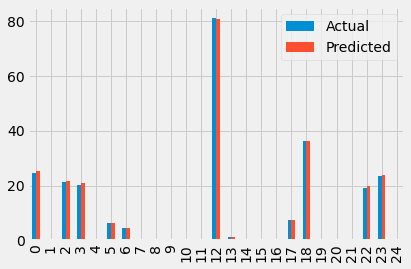

In [ ]:
graph=dframe.head(25)
graph.plot(kind='bar')

<ipython-input-36-6ffb7efa03cc>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='indigo',lw=3)


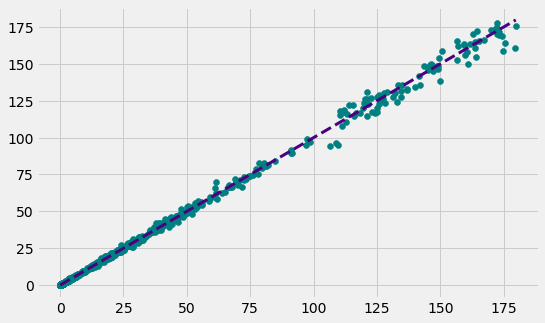

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,svm_prediction,c='teal')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='indigo',lw=3)